In [24]:
import pandas as pd
import sys
sys.path.append('../src')
from functions import *
import seaborn as sns
# raw data
df_clients_profile = pd.read_csv('../Data/Raw/df_final_demo.txt')
df_web_data_1 = pd.read_csv('../Data/Raw/df_final_web_data_pt_1.txt')
df_web_data_2 = pd.read_csv('../Data/Raw/df_final_web_data_pt_2.txt')
df_experiment_clients = pd.read_csv('../Data/Raw/df_final_experiment_clients.txt')
# processed data
df_test = pd.read_csv('../Data/Cleaned_Data/df_test.csv')
df_test_final = pd.read_csv('../Data/Cleaned_Data/df_test_final.csv')
df_control = pd.read_csv('../Data/Cleaned_Data/df_control.csv')
df_control_final = pd.read_csv('../Data/Cleaned_Data/df_control_final.csv')
df_final = pd.read_csv('../Data/Cleaned_Data/df_final.csv')
df_combined = pd.read_csv('../Data/Cleaned_Data/df_combined.csv')
pd.set_option('display.max_columns', None)
df_web_data = pd.concat([df_web_data_1, df_web_data_2], ignore_index= True)

In [25]:
df_test = convert_data_types_combined(df_test)
df_test_final = convert_data_types_combined(df_test_final)
df_control = convert_data_types_combined(df_control)
df_control_final = convert_data_types_combined(df_control_final)
df_final = convert_data_types_combined(df_final)
df_combined = convert_data_types_combined(df_combined)

# Day 1 & 2 (Week 5)

Answer the following questions about demographics:

Who are the primary clients using this online process?
Are the primary clients younger or older, new or long-standing?


In [26]:
def basic_statistics(df: pd.DataFrame, columns):
    statistics = {}  # Dictionary to store statistics for each column

    for column in columns:
        if pd.api.types.is_numeric_dtype(df[column]):  # Check if column is numeric
            # central tendency
            median = df[column].median()
            mode = df[column].mode().iloc[0]  # Get first mode if there are multiple
            mean = df[column].mean()

            # dispersion
            std_dev = df[column].std()
            variance = df[column].var()
            range_value = df[column].max() - df[column].min()  # Use range_value to avoid overwriting built-in range
            quantiles = df[column].quantile([0.25, 0.5, 0.75])  # Calculate 25th, 50th, 75th percentiles
            inter_QR = quantiles[0.75] - quantiles[0.25]

            # shape
            skewness = df[column].skew()
            kurtosis = df[column].kurtosis()

            statistics[column] = {
                'median': median,
                'mode': mode,
                'mean': mean,
                'std_dev': std_dev,
                'variance': variance,
                'range': range_value,
                '25th_percentile': quantiles[0.25],
                'median': quantiles[0.5],
                '75th_percentile': quantiles[0.75],
                'IQR': inter_QR,
                'skewness': skewness,
                'kurtosis': kurtosis
            }
        else:
            statistics[column] = 'Non-numeric column'  # Add a message for non-numeric columns
    
    #create new dataframe
    df_statistics = pd.DataFrame.from_dict(statistics)

    return df_statistics.transpose() #transpose to have columns as the variables

In [29]:
test_stats = ['start_time', 'step_1', 'step_2','step_3', 'time_completion',
         'navigations_bt_start_last', '1st_step', 
         '2nd_step', '3rd_step', 'clnt_tenure_yr', 'clnt_tenure_mnth', 
         'clnt_age', 'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth',]
df_test_stats = pd.DataFrame(basic_statistics(df_control_final,test_stats))

In [30]:
df_test_stats

,median,mode,mean,std_dev,variance,range,25th_percentile,75th_percentile,IQR,skewness,kurtosis
start_time,0.12,0.00,0.142772,0.138085,0.019067,0.52,0.00,0.23,0.23,0.756151,-0.319838
step_1,0.08,0.00,0.115600,0.134652,0.018131,0.46,0.00,0.19,0.19,0.989727,-0.153634
step_2,0.21,0.00,0.293026,0.313473,0.098265,0.93,0.00,0.59,0.59,0.370291,-1.486733
step_3,0.00,0.00,0.233047,0.283053,0.080119,0.86,0.00,0.49,0.49,0.656830,-1.128748
time_completion,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.000000,0.000000
navigations_bt_start_last,1.00,1.00,0.506589,0.499983,0.249983,1.00,0.00,1.00,1.00,-0.026364,-1.999727
1st_step,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.000000,0.000000
2nd_step,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.000000,0.000000
3rd_step,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.000000,0.000000
clnt_tenure_yr,9.00,6.00,10.551081,5.458062,29.790437,24.00,6.00,14.00,8.00,0.739174,-0.306068


In [31]:
control_stats = ['start_time', 'step_1', 'step_2','step_3', 'time_completion',
         'navigations_bt_start_last', '1st_step', 
         '2nd_step', '3rd_step', 'clnt_tenure_yr', 'clnt_tenure_mnth', 
         'clnt_age', 'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth',]
df_control_stats = pd.DataFrame(basic_statistics(df_test_final,control_stats))

In [6]:
df_control_stats

,median,mode,mean,std_dev,variance,range,25th_percentile,75th_percentile,IQR,skewness,kurtosis
start_time,0.117928,0.000000,0.143017,0.138127,0.019079,0.521634,0.000000,0.232986,0.232986,0.749710,-0.333858
step_1,0.077001,0.000000,0.115749,0.134607,0.018119,0.462341,0.000000,0.190389,0.190389,0.983787,-0.167512
step_2,0.212195,0.000000,0.293069,0.313517,0.098293,0.928090,0.000000,0.589727,0.589727,0.370636,-1.485917
step_3,0.000000,0.000000,0.233093,0.283069,0.080128,0.864456,0.000000,0.490445,0.490445,0.656940,-1.127409
time_completion,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
navigations_bt_start_last,1.026672,1.026672,0.917180,0.133979,0.017950,0.421007,0.741276,1.026672,0.285396,-0.312895,-1.553658
completion,0.000000,0.000000,0.437955,0.496799,0.246809,3.000000,0.000000,1.000000,1.000000,0.263055,-1.869037
1st_step,0.526589,0.526589,0.359458,0.251304,0.063154,0.741276,0.000000,0.526589,0.526589,-0.691584,-1.407254
2nd_step,0.526589,0.526589,0.306346,0.274250,0.075213,0.741276,0.000000,0.526589,0.526589,-0.150881,-1.797102
3rd_step,0.526589,0.000000,0.271042,0.273174,0.074624,0.741276,0.000000,0.526589,0.526589,0.066765,-1.863298


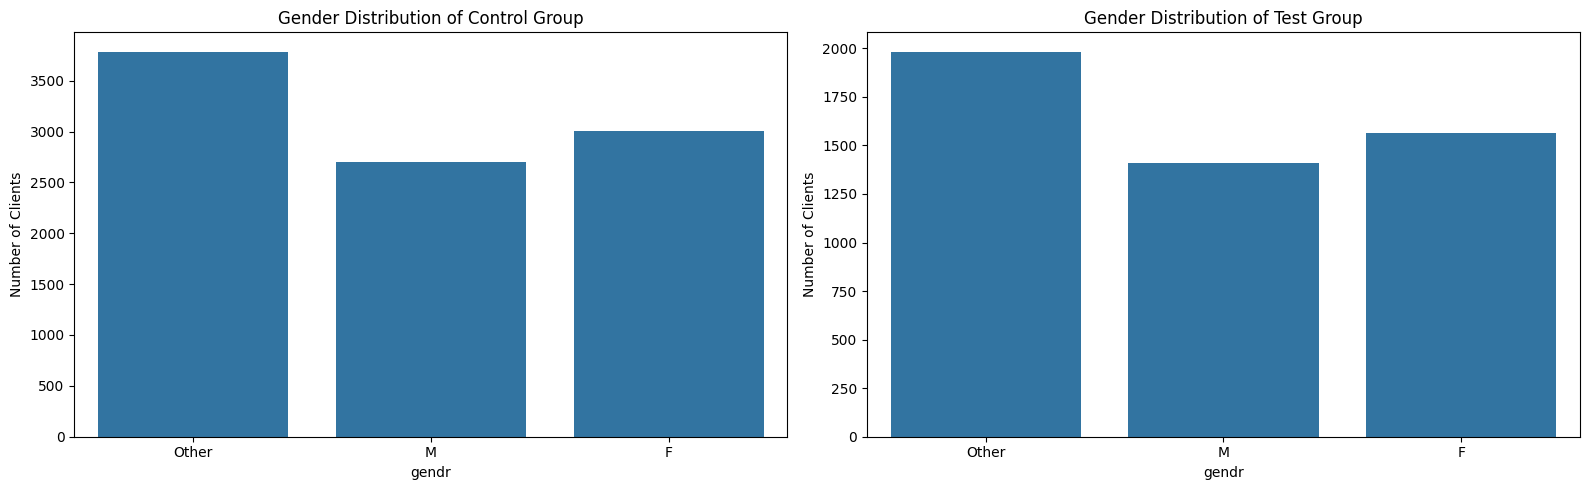

In [7]:
# 1. Who are the primary clients using this online process?

# Gender distribution
# Gender distribution
plt.figure(figsize=(16, 5))

plt.subplot(1, 2, 1)
sns.countplot(data=df_control_final, x='gendr')
plt.title('Gender Distribution of Control Group')
plt.ylabel('Number of Clients')

plt.subplot(1, 2, 2)
sns.countplot(data=df_test_final, x='gendr')
plt.title('Gender Distribution of Test Group')
plt.ylabel('Number of Clients')

plt.tight_layout()
plt.show()

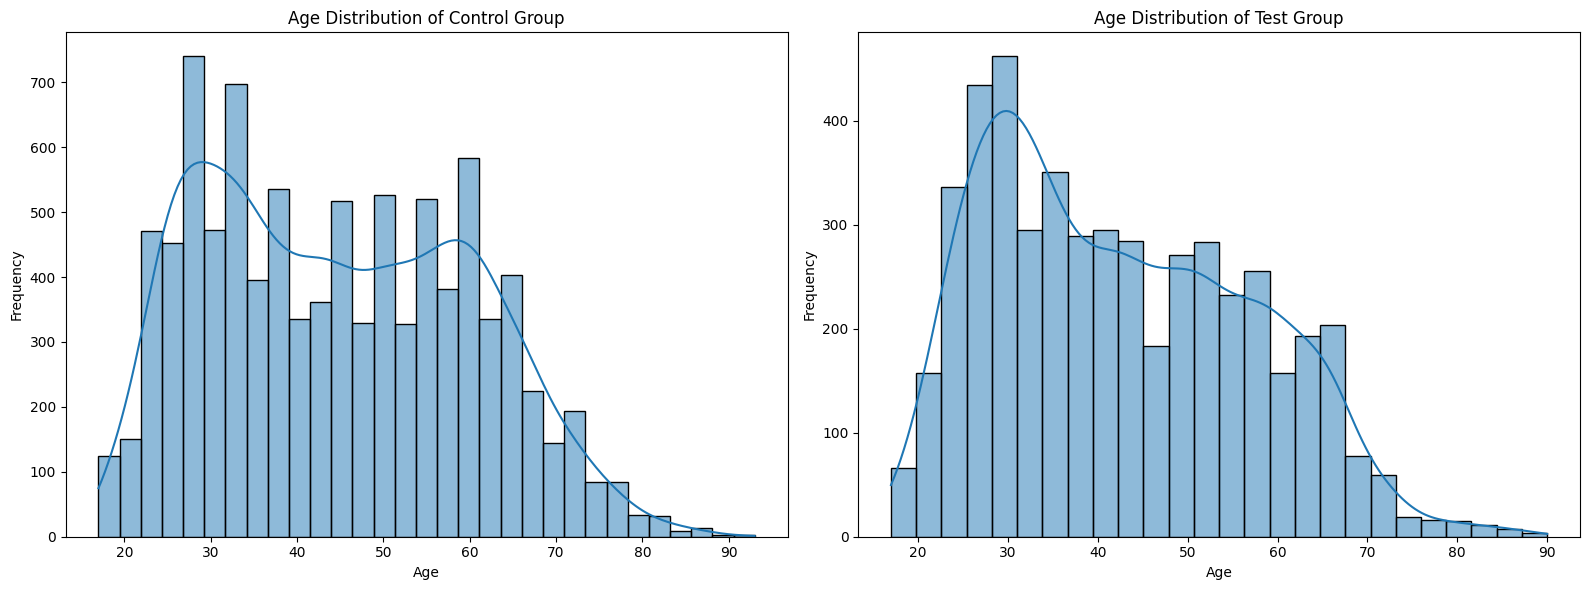

In [8]:
# Age distribution
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=df_control_final, x='clnt_age', kde=True)
plt.title('Age Distribution of Control Group')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(data=df_test_final, x='clnt_age', kde=True)
plt.title('Age Distribution of Test Group')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [9]:
completed_visits = df_control_final['last_step'] == 'confirm'
completed_visits.value_counts()

last_step
False    5332
True     4153
Name: count, dtype: int64

In [10]:
# 2. Are the primary clients younger or older, new or long-standing?

print(f"Average client age: {df_control_final['clnt_age'].mean()}")
print(f"Average client tenure (months): {df_control_final['clnt_tenure_mnth'].mean()}")

Average client age: 44.67843964153927
Average client tenure (months): 132.72894043226145


In [11]:
# Calculate the average time spent on each step for df_control_final
average_time_per_step_control = df_control_final[['step_1', 'step_2', 'step_3']].mean()

# Calculate the average time spent on each step for df_test_final
average_time_per_step_test = df_test_final[['step_1', 'step_2', 'step_3']].mean()

print("Average time spent on each step (Control Group):")
print(average_time_per_step_control)

print("\nAverage time spent on each step (Test Group):")
print(average_time_per_step_test)


Average time spent on each step (Control Group):
step_1    0.115749
step_2    0.293069
step_3    0.233093
dtype: float64

Average time spent on each step (Test Group):
step_1    0.266956
step_2    0.550536
step_3    0.384065
dtype: float64


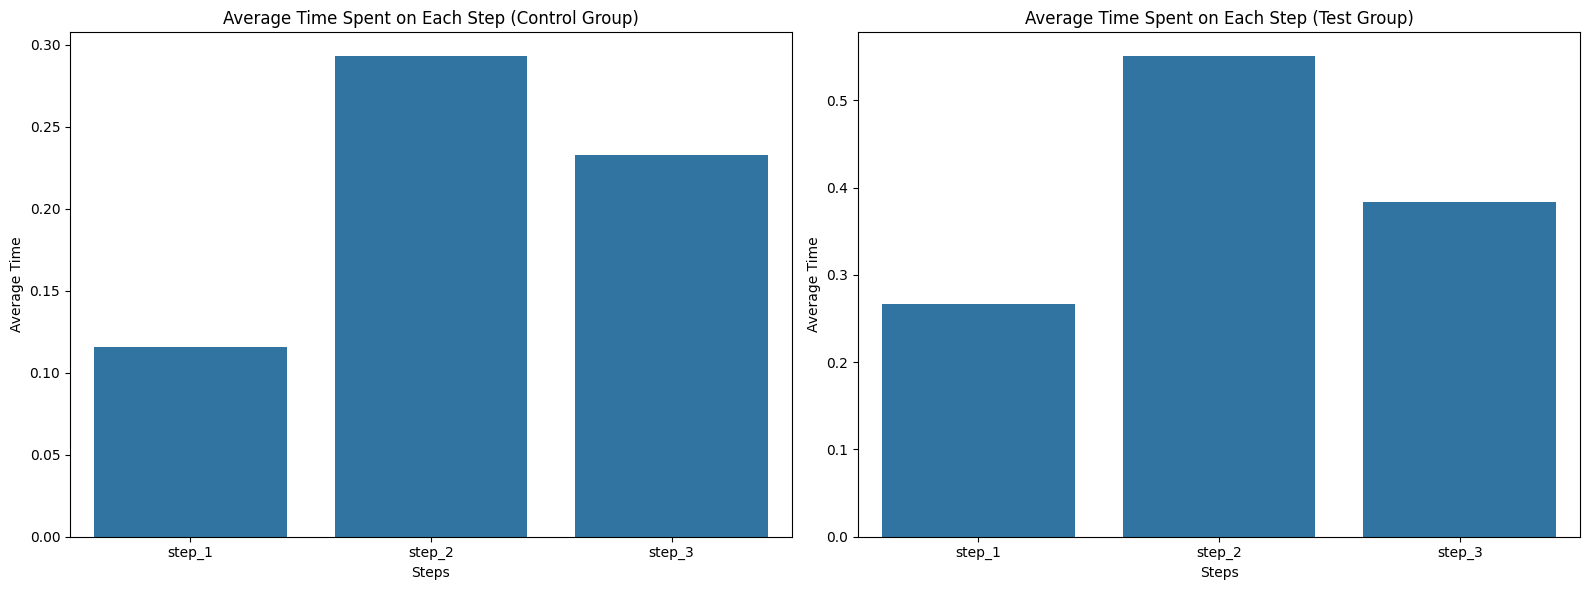

In [12]:
# Plotting the average time spent on each step for control and test data side by side
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=average_time_per_step_control.index, y=average_time_per_step_control.values)
plt.title('Average Time Spent on Each Step (Control Group)')
plt.xlabel('Steps')
plt.ylabel('Average Time')

plt.subplot(1, 2, 2)
sns.barplot(x=average_time_per_step_test.index, y=average_time_per_step_test.values)
plt.title('Average Time Spent on Each Step (Test Group)')
plt.xlabel('Steps')
plt.ylabel('Average Time')

plt.tight_layout()
plt.show()

In [13]:
# Calculate the average time spent on each step for df_control_final
average_time_per_step_control = df_control_final[['step_1', 'step_2', 'step_3']].mean()

# Calculate the average time spent on each step for df_test_final
average_time_per_step_test = df_test_final[['step_1', 'step_2', 'step_3']].mean()

In [14]:
df_control.columns

Index(['client_id', 'visitor_id', 'visit_id', 'process_step', 'date_time',
       'Variation', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth'],
      dtype='object')

In [15]:
# Completion rate (assuming 'confirm_time' indicates completion)
completion_rate = df_control_final['confirm'].notnull().mean() * 100
print(f"\nOverall completion rate: {completion_rate:.2f}%")

KeyError: 'confirm'

In [ ]:
# Error rates (assuming empty values in step columns indicate errors)
error_rates = df_control_final[step_columns].isnull().mean() * 100
print("\nError rates per step:")
print(error_rates)


Error rates per step:
step_1    0.0
step_2    0.0
step_3    0.0
dtype: float64


In [ ]:
completed_visits = df_control_final['last_step'] == 'confirm'

In [ ]:
import pandas as pd

# 1. Data Preparation:
df_test['date_time'] = pd.to_datetime(df_test['date_time'])
df_test['date'] = df_test['date_time'].dt.date

# 2. Calculate time differences per step and make them positive:
# We need to sort the dataframe before calculating the time difference
df_test = df_test.sort_values(by=['visit_id', 'client_id', 'date_time'])

df_test['next_date_time'] = df_test.groupby(['visit_id', 'client_id'])['date_time'].shift(-1)


# Calculate time spent in seconds, but make sure it's always positive
df_test['time_diff_seconds'] = (df_test['next_date_time'] - df_test['date_time']).dt.total_seconds().abs()
df_test['time_diff_minutes'] = df_test['time_diff_seconds'] / 60

# 3. Pivot to Create Step Columns:
df_pivot = df_test.pivot_table(index=['client_id', 'visitor_id', 'visit_id'], columns='process_step', values='time_diff_minutes', fill_value=0)
df_pivot = df_pivot.reset_index()
df_pivot.columns.name = None  # Remove the 'process_step' header

# 4. Rename Columns & Calculate Total Time:
df_pivot = df_pivot.rename(columns={'confirm': 'confirm_time', 'start': 'start_time', 'step_1': 'step_1', 'step_2': 'step_2', 'step_3': 'step_3'})

df_pivot['total_time_visit'] = df_pivot[['start_time', 'step_1', 'step_2', 'step_3', 'confirm_time']].sum(axis=1)


# 5. Merge with Original Data and Select/Reorder Columns:
df_test_final = pd.merge(df_pivot, df_test[['client_id', 'visit_id','Variation', 'clnt_tenure_yr',
       'clnt_tenure_mnth', 'clnt_age', 'gendr', 'num_accts', 'bal',
       'calls_6_mnth', 'logons_6_mnth', 'date', 'process_step']], on=['client_id', 'visit_id'], how='left')

df_test_final = df_test_final.drop_duplicates()

#Reorder to desired column order
df_test_final = df_test_final[['client_id', 'visitor_id', 'visit_id', 'Variation', 'clnt_tenure_yr',
       'clnt_tenure_mnth', 'clnt_age', 'gendr', 'num_accts', 'bal',
       'calls_6_mnth', 'logons_6_mnth', 'date', 'start_time',
       'step_1', 'step_2', 'step_3', 'confirm_time','total_time_visit', 'process_step']]


# Get last step per visit_id
df_test_final['last_step'] = df_test_final.groupby('visit_id')['process_step'].transform('last')
df_test_final = df_test_final.drop(columns=['process_step'])

df_test_final = df_test_final.drop_duplicates()

In [ ]:
df_test_final['visit_visitor_id'] = df_test_final['visitor_id'] + " " +df_test_final['visit_id'] 

In [ ]:
#Reorder to desired column order
df_test_final = df_test_final[['client_id', 'visit_visitor_id', 'Variation', 'clnt_tenure_yr',
       'clnt_tenure_mnth', 'clnt_age', 'gendr', 'num_accts', 'bal',
       'calls_6_mnth', 'logons_6_mnth', 'date', 'start_time',
       'step_1', 'step_2', 'step_3', 'confirm_time','total_time_visit','last_step']]
df_test_final.shape


(31630, 19)

In [ ]:
df_test_final = df_test_final.drop_duplicates(subset='visit_visitor_id', keep='first')

In [ ]:
df_control_final.columns

Index(['client_id', 'visit_visitor_id', 'Variation', 'clnt_tenure_yr',
       'clnt_tenure_mnth', 'clnt_age', 'gendr', 'num_accts', 'bal',
       'calls_6_mnth', 'logons_6_mnth', 'date', 'start_time', 'step_1',
       'step_2', 'step_3', 'confirm_time', 'total_time_visit', 'last_step'],
      dtype='object')

In [ ]:
df_test_final.columns

Index(['client_id', 'visit_visitor_id', 'Variation', 'clnt_tenure_yr',
       'clnt_tenure_mnth', 'clnt_age', 'gendr', 'num_accts', 'bal',
       'calls_6_mnth', 'logons_6_mnth', 'date', 'start_time', 'step_1',
       'step_2', 'step_3', 'confirm_time', 'total_time_visit', 'last_step'],
      dtype='object')

In [ ]:
df_test_final.head(15)

,client_id,visit_visitor_id,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,date,start_time,step_1,step_2,step_3,confirm_time,total_time_visit,last_step
0,555,402506806_56087378777 637149525_38041617439_71...,Test,3,46,29,Other,2,25454.66,2,6,2017-04-15,0.116667,0.533333,1.650000,0.333333,0.000000,2.633333,confirm
5,647,66758770_53988066587 40369564_40101682850_311847,Test,12,151,57,M,2,30525.80,0,4,2017-04-12,0.116667,0.300000,3.150000,2.716667,0.000000,6.283333,confirm
10,934,810392784_45004760546 7076463_57954418406_971348,Test,9,109,51,F,2,32522.88,0,3,2017-04-18,0.788889,0.000000,0.000000,0.000000,0.000000,0.788889,start
14,1336,920624746_32603333901 583743392_96265099036_93...,Test,48,576,42,M,4,130537.18,6,9,2017-05-08,0.416667,0.433333,0.850000,1.816667,0.000000,3.516667,confirm
19,1336,920624746_32603333901 614001770_19101025926_11...,Test,48,576,42,M,4,130537.18,6,9,2017-05-08,0.000000,0.000000,0.000000,0.000000,1.366667,1.366667,confirm
21,1346,123474046_4204671056 27144337_83739845380_214282,Test,14,177,46,F,2,822512.91,3,6,2017-06-06,0.530000,1.683333,0.816667,1.416667,0.000000,4.446667,step_3
31,1516,182314299_63168583136 255400977_38039535960_77...,Test,12,150,58,F,2,25408.39,5,8,2017-04-06,0.933333,0.583333,10.116667,4.266667,0.000000,15.900000,confirm
36,1516,182314299_63168583136 481123290_95510977345_70...,Test,12,150,58,F,2,25408.39,5,8,2017-04-05,0.266667,0.833333,0.361111,0.000000,0.000000,1.461111,step_2
47,1643,121807985_20524560478 753205700_16851596206_13...,Test,19,229,55,M,2,81731.39,0,3,2017-06-10,1.000000,0.266667,9.700000,0.500000,0.000000,11.466667,confirm
52,1643,910842861_51062379179 633860590_96880450633_97...,Test,19,229,55,M,2,81731.39,0,3,2017-04-24,0.733333,0.750000,0.000000,0.000000,0.000000,1.483333,step_1


In [ ]:
df_control_final.head(15)

,client_id,visit_visitor_id,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,date,start_time,step_1,step_2,step_3,confirm_time,total_time_visit,last_step
0,1028,42237450_62128060588 557292053_87239438319_391157,Control,12,145,36,M,3,103520.22,1,4,2017-04-08,0.816667,1.566667,4.733333,1.850000,0.0,8.966667,step_1
9,1104,194240915_18158000533 543158812_46395476577_76...,Control,5,66,48,Other,3,154643.94,6,9,2017-06-12,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,start
10,1104,194240915_18158000533 643221571_99977972121_69283,Control,5,66,48,Other,3,154643.94,6,9,2017-06-20,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,start
11,1186,446844663_31615102958 507052512_11309370126_44...,Control,8,99,22,Other,2,31662.52,0,3,2017-04-08,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,start
12,1186,446844663_31615102958 795373564_99931517312_81...,Control,8,99,22,Other,2,31662.52,0,3,2017-04-08,0.183333,0.183333,0.000000,0.000000,0.0,0.366667,step_2
15,1195,766842522_69992551638 393817425_39015278493_99...,Control,21,262,54,M,2,28457.96,2,5,2017-04-05,0.550000,1.633333,0.516667,1.383333,0.0,4.083333,confirm
20,1197,753759429_54481946928 71862471_21202285428_848395,Control,7,85,28,Other,5,177062.14,5,8,2017-04-01,0.066667,0.100000,0.950000,0.466667,0.0,1.583333,confirm
27,1368,366307863_19014662045 784065271_45379483290_30...,Control,5,60,45,F,3,61956.25,6,9,2017-04-09,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,start
28,2439,607208067_70160939111 848231744_22569944243_37711,Control,11,142,56,M,2,504142.55,0,3,2017-03-23,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,start
29,2581,770616558_80928163524 182925466_27021409208_83502,Control,4,58,22,M,2,24976.79,1,4,2017-04-09,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,start


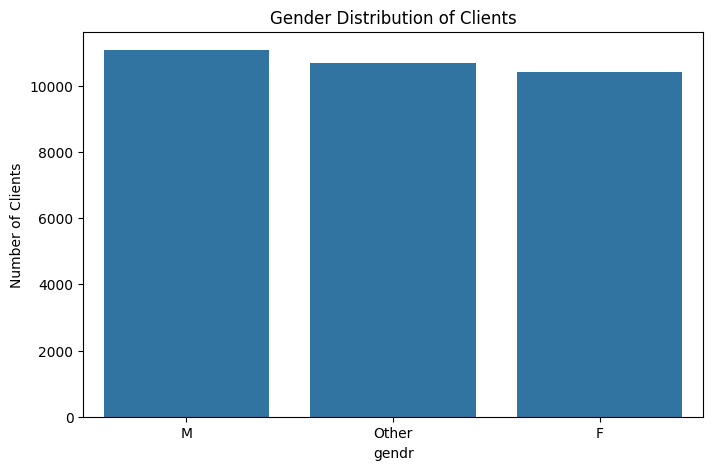

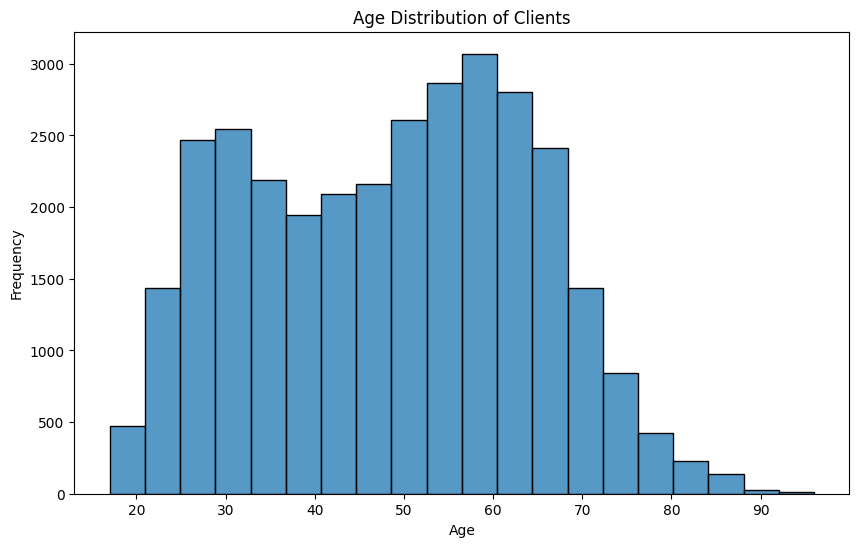

In [ ]:
# 1. Who are the primary clients using this online process?

# Gender distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df_control_final, x='gendr')
plt.title('Gender Distribution of Clients')
plt.ylabel('Number of Clients')
plt.show()

# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df_control_final, x='clnt_age', bins=20, kde=False)
plt.title('Age Distribution of Clients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()



In [ ]:
# 2. Are the primary clients younger or older, new or long-standing?
print("\nClient Demographics Summary:")
print(df_control_final[['clnt_age', 'clnt_tenure_mnth']].describe())




Client Demographics Summary:
           clnt_age  clnt_tenure_mnth
count  32181.000000      32181.000000
mean      48.462509        154.159691
std       15.796989         84.174236
min       17.000000         33.000000
25%       35.000000         82.000000
50%       50.000000        141.000000
75%       61.000000        196.000000
max       96.000000        669.000000


In [ ]:
completed_visits = df_control_final['last_step'] == 'confirm'

In [ ]:

# 3. Client Behavior Analysis

# Time spent per step
step_time_analysis = df_control_final[['start_time', 'step_1', 'step_2', 'step_3', 'confirm_time']].describe()
print("\nTime Spent on Each Step (in minutes):")
print(step_time_analysis)

# Completion Rate
completed_visits = df_control_final['last_step'] == 'confirm'
completion_rate = completed_visits.mean() * 100
print(f"\nOverall Completion Rate: {completion_rate:.2f}%")

# Error Rate (Assuming NaN in a step means the user did not complete it)
error_rates = df_control_final[['step_1', 'step_2', 'step_3']].isnull().mean() * 100
print("\nError Rates Per Step:")
print(error_rates)




Time Spent on Each Step (in minutes):
         start_time        step_1        step_2        step_3  confirm_time
count  32181.000000  32181.000000  32181.000000  32181.000000  32181.000000
mean       1.233545      0.679629      1.155187      1.437567      0.167699
std        5.622045      2.856209      2.865290      3.419878      2.324682
min        0.000000      0.000000      0.000000      0.000000      0.000000
25%        0.083333      0.000000      0.000000      0.000000      0.000000
50%        0.283333      0.183333      0.650000      0.350000      0.000000
75%        0.800000      0.616667      1.566667      1.533333      0.000000
max      699.283333    268.300000    362.716667    121.133333    156.600000

Overall Completion Rate: 47.66%

Error Rates Per Step:
step_1    0.0
step_2    0.0
step_3    0.0
dtype: float64


In [ ]:
# 4. KPI and Metrics Review
print("\nKey Performance Indicators (KPIs):")
print("- Completion Rate")
print("- Time Spent on Each Step")
print("- Error Rate per Step")
print("- Drop-off Rate per Step")  # (We'll calculate this below)

# Calculate Drop-off Rate per Step
def calculate_dropoff_rate(df, step_col):
    total_reached_step = df[step_col].notnull().sum()
    completed_after_step = df[df['last_step'] == 'confirm'][step_col].notnull().sum()
    return (1 - (completed_after_step / total_reached_step)) * 100

dropoff_rates = {
    'start_time': 0,  # No drop-off at the start
    'step_1': calculate_dropoff_rate(df_control_final, 'step_1'),
    'step_2': calculate_dropoff_rate(df_control_final, 'step_2'),
    'step_3': calculate_dropoff_rate(df_control_final, 'step_3')
}

print("\nDrop-off Rates per Step:")
print(dropoff_rates)


Key Performance Indicators (KPIs):
- Completion Rate
- Time Spent on Each Step
- Error Rate per Step
- Drop-off Rate per Step

Drop-off Rates per Step:
{'start_time': 0, 'step_1': 52.344551132655916, 'step_2': 52.344551132655916, 'step_3': 52.344551132655916}


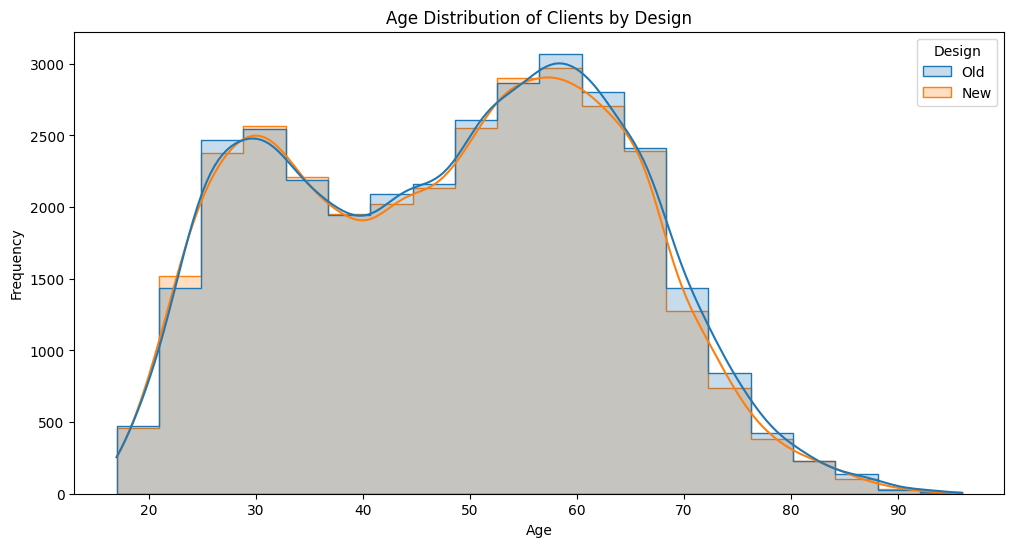

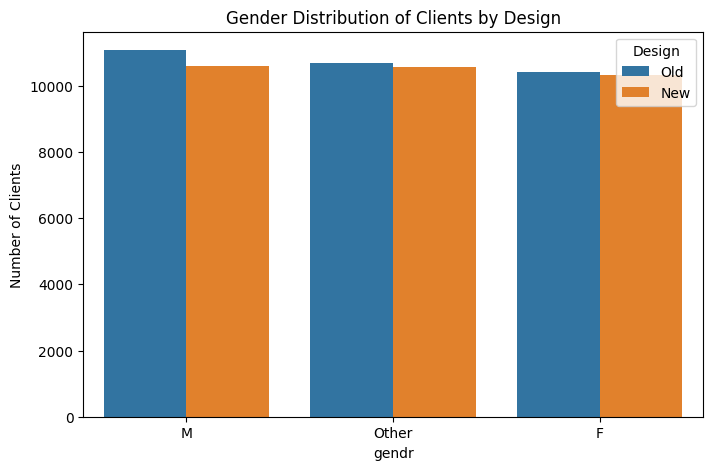


Client Demographics Summary by Design:
       clnt_age                                                      \
          count       mean        std   min   25%   50%   75%   max   
Design                                                                
New     31498.0  48.069592  15.678841  17.0  34.0  49.0  60.0  96.0   
Old     32181.0  48.462509  15.796989  17.0  35.0  50.0  61.0  96.0   

       clnt_tenure_mnth                                                   \
                  count        mean        std   min   25%    50%    75%   
Design                                                                     
New             31498.0  152.316401  83.068752  33.0  82.0  138.0  193.0   
Old             32181.0  154.159691  84.174236  33.0  82.0  141.0  196.0   

               
          max  
Design         
New     669.0  
Old     669.0  


KeyError: "The following id_vars or value_vars are not present in the DataFrame: ['visit_id']"

<Figure size 1200x800 with 0 Axes>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already loaded the data into df_control_final and df_test_final

# Combine DataFrames and add a 'Design' column to distinguish between them
df_control_final['Design'] = 'Old'
df_test_final['Design'] = 'New'
combined_df = pd.concat([df_control_final, df_test_final])

# 1. Who are the primary clients using this online process?

plt.figure(figsize=(12, 6))
sns.histplot(data=combined_df, x='clnt_age', hue='Design', bins=20, kde=True, element="step")
plt.title('Age Distribution of Clients by Design')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(data=combined_df, x='gendr', hue='Design')
plt.title('Gender Distribution of Clients by Design')
plt.ylabel('Number of Clients')
plt.show()

# 2. Are the primary clients younger or older, new or long-standing?
print("\nClient Demographics Summary by Design:")
print(combined_df.groupby('Design')[['clnt_age', 'clnt_tenure_mnth']].describe())

# 3. Client Behavior Analysis

# Time spent per step by design
plt.figure(figsize=(12, 8))
sns.barplot(data=combined_df.melt(id_vars=['visit_id', 'Design'], value_vars=['start_time', 'step_1', 'step_2', 'step_3', 'confirm_time']),
            x='variable', y='value', hue='Design')
plt.title('Time Spent on Each Step by Design')
plt.xlabel('Step')
plt.ylabel('Average Time (minutes)')
plt.xticks(rotation=45)
plt.show()

# 4 & 5. KPI Review & Identification
# Key Performance Indicators (KPIs)
print("\nKey Performance Indicators (KPIs):")
print("- Completion Rate")
print("- Time Spent on Each Step")
print("- Error Rate per Step (Assuming NaN indicates error)")
print("- Drop-off Rate per Step")

# 6. Calculate KPIs

# Completion Rate
completion_rate = combined_df.groupby('Design')['last_step'].apply(lambda x: (x == 'confirm').mean() * 100)
print("\nCompletion Rate by Design:")
print(completion_rate)

# Error Rates (Assuming NaN in a step means the user did not complete it)
error_rates = combined_df.groupby('Design')[['step_1', 'step_2', 'step_3']].apply(lambda x: x.isnull().mean() * 100)
print("\nError Rates Per Step by Design:")
print(error_rates)

# Drop-off Rate
def calculate_dropoff_rate(df, step_col):
    total_reached_step = df[step_col].notnull().sum()
    completed_after_step = df[df['last_step'] == 'confirm'][step_col].notnull().sum()
    return (1 - (completed_after_step / total_reached_step)) * 100 if total_reached_step > 0 else 0

dropoff_rates = combined_df.groupby('Design').apply(
    lambda x: pd.Series({
        'start_time': 0,  
        'step_1': calculate_dropoff_rate(x, 'step_1'),
        'step_2': calculate_dropoff_rate(x, 'step_2'),
        'step_3': calculate_dropoff_rate(x, 'step_3')
    })
)
print("\nDrop-off Rates per Step by Design:")
print(dropoff_rates)


In [ ]:
df_test_final.shape

(31498, 19)

In [ ]:
df_control_final.shape

(32181, 20)

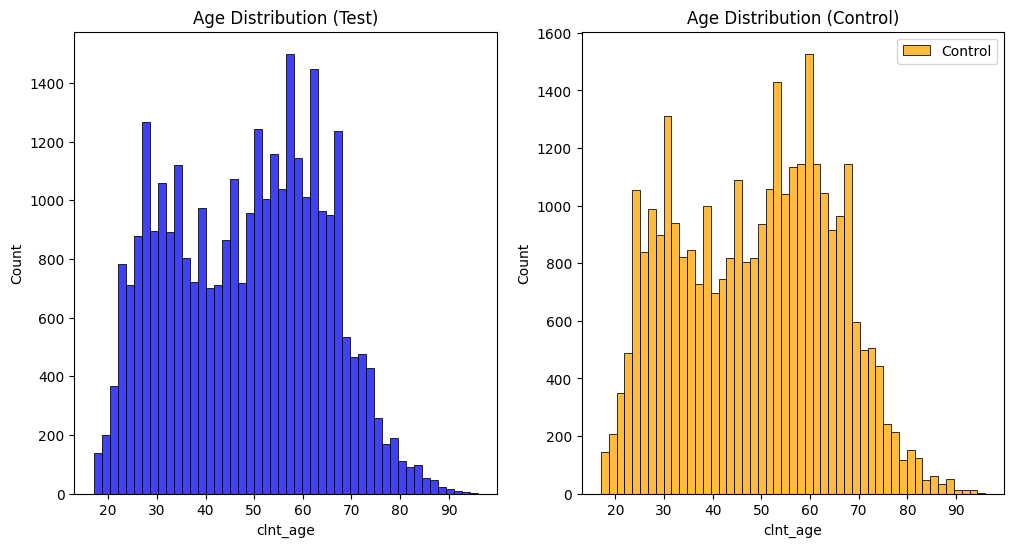

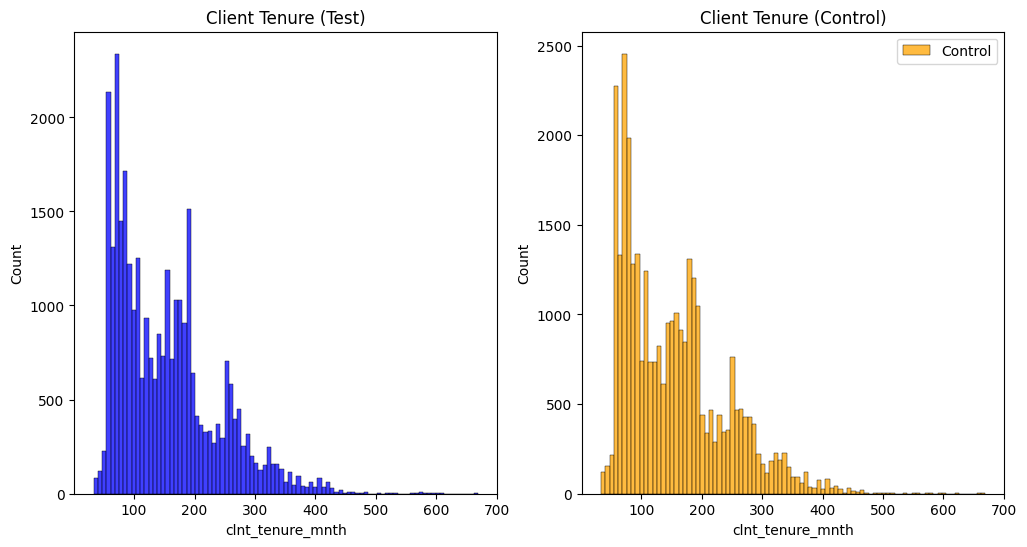

In [ ]:
# Age Distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_test_final['clnt_age'], kde=False, color='blue', label='Test')
plt.title('Age Distribution (Test)')

plt.subplot(1, 2, 2)
sns.histplot(df_control_final['clnt_age'], kde=False, color='orange', label='Control')
plt.title('Age Distribution (Control)')
plt.legend()
plt.show()

# Tenure Distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_test_final['clnt_tenure_mnth'], kde=False, color='blue', label='Test')
plt.title('Client Tenure (Test)')

plt.subplot(1, 2, 2)
sns.histplot(df_control_final['clnt_tenure_mnth'], kde=False, color='orange', label='Control')
plt.title('Client Tenure (Control)')
plt.legend()
plt.show()

Age Distribution:

Test Group (New Design): The age distribution appears slightly right-skewed, suggesting a higher concentration of younger clients in the test group. The majority of clients in the test group fall within the age range of 30-60. There's a notable decline in the number of clients above 70 years old.
Control Group (Old Design): The age distribution also seems right-skewed, similar to the test group. The majority of clients in the control group are also between 30-60 years old, with a similar decline in older clients.
Overall Comparison: Both distributions have a similar shape, but the test group seems to have slightly more younger clients and slightly fewer older clients than the control group. However, this difference appears subtle.
Client Tenure Distribution:

Test Group (New Design): The tenure distribution is heavily right-skewed, indicating a large number of clients with relatively short tenure (less than 100 months). There's a long tail with a smaller number of clients having much longer tenure.
Control Group (Old Design): The tenure distribution mirrors the test group, with a heavy right skew and a long tail. This suggests a similar pattern of client tenure in both groups.
Overall Comparison: The tenure distributions for both groups are very similar, indicating that the new design does not appear to attract or deter clients based on their tenure with the company.
Key Insights:

Primary Clients: The primary clients for both designs are middle-aged, with the majority falling between 30 and 60 years old.
Tenure Impact: The new design does not seem to significantly impact client tenure. Both groups exhibit similar tenure distributions.
Age Impact: There might be a slight tendency for the new design to attract relatively younger clients, but this difference is not very pronounced.

| KPI                  |     Test |   Control |
|:---------------------|---------:|----------:|
| Time Spent on Step 1 | 0.723915 |  0.679629 |
| Time Spent on Step 2 | 1.1341   |  1.15519  |
| Time Spent on Step 3 | 1.32291  |  1.43757  |
| Completion Rate      | 0.607467 |  0.476554 |


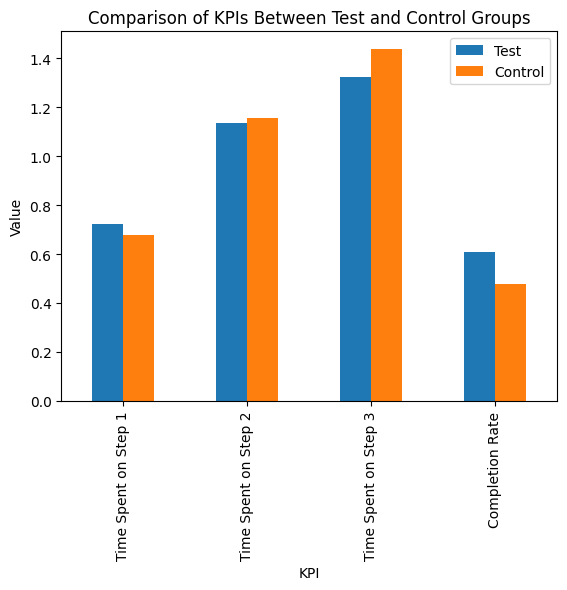

In [ ]:
# Calculate KPIs
def calculate_kpi(df):
    completion_rate = df['last_step'].eq('confirm').mean()
    time_step_1 = df['step_1'].mean()
    time_step_2 = df['step_2'].mean()
    time_step_3 = df['step_3'].mean()
    return time_step_1, time_step_2, time_step_3,completion_rate

test_kpis = calculate_kpi(df_test_final)
control_kpis = calculate_kpi(df_control_final)

# Create a DataFrame to store the results
kpi_df = pd.DataFrame({'KPI': ['Time Spent on Step 1', 'Time Spent on Step 2', 'Time Spent on Step 3','Completion Rate'],
                     'Test': test_kpis,
                     'Control': control_kpis})

print(kpi_df.to_markdown(index=False))


# Visualization:
kpi_df.plot(x='KPI', kind='bar')
plt.title('Comparison of KPIs Between Test and Control Groups')
plt.ylabel('Value')
plt.show()

